# Guided Project: Predicting Car Prices

<a href="https://archive.ics.uci.edu/ml/datasets/automobile">Dataset Description</a>
<br />
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">DataFile</a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = ["symboling",
"normalized-losses",
"make",
"fuel-type",
"aspiration",
"num-of-doors",
"body-style",
"drive-wheels",
"engine-location",
"wheel-base",
"length",
"width",
"height",
"curb-weight",
"engine-type",
"num-of-cylinders",
"engine-size",
"fuel-system",
"bore",
"stroke",
"compression-ratio",
"horsepower",
"peak-rpm",
"city-mpg",
"highway-mpg",
"price"]

cars = pd.read_csv('imports-85.data', names = cols)
cars.shape


(205, 26)

In [3]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
#Выделяем только числовые поля

continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
continuous_cars = cars[continuous_cols]
continuous_cars.shape

(205, 14)

# 2/6 Data Cleaning

* Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
* Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.
* Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
    * Replace the missing values using the average values from that column.
    * Drop the rows entirely (especially if other columns in those rows have missing values).
    * Drop the column entirely.
* Explore the missing value counts for the other numeric columns and handle any missing values.
* Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

In [5]:
#Чистим данные от пустых значений

continuous_cars = continuous_cars.replace('?', np.NaN).astype(float)
continuous_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
#Обязательно чистим от пустых значений поле "price"
continuous_cars = continuous_cars.dropna(subset = ['price'])
continuous_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
#Неплохо, но избавимся от пустых значений, заполним поле среднем по колонке
continuous_cars = continuous_cars.fillna(continuous_cars.mean())
continuous_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
#Вот теперь хорошо. Осталось малость - нормализуем все числовые значения
price = continuous_cars['price']
continuous_cars = (continuous_cars - continuous_cars.min())/(continuous_cars.max() - continuous_cars.min())
continuous_cars['price'] = price

In [9]:
continuous_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


# 3/6 Univariate Model

* Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
    * This function should split the data set into a training and test set.
    * Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    * Finally, it should calculate the RMSE and return that value.
* Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
    * Modify the knn_train_test() function you wrote to accept a parameter for the k value.
    * Update the function logic to use this parameter.
    * For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [10]:
#Понеслось строительство моделек


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [11]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    df2 = df.reindex(np.random.permutation(df.index))

    train_df = df2.iloc[0:int(len(df2) / 2)]
    test_df = df2.iloc[int(len(df2) / 2):]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    predicted_labels = knn.predict(test_df[[train_col]])

    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)

    return rmse

rmse_results = {}
for col in continuous_cars.columns.drop('price'):
    rmse_val = knn_train_test(col, 'price', continuous_cars)
    rmse_results[col] = rmse_val

rmse_results = pd.Series(rmse_results).sort_values()

rmse_results

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [12]:
def knn_train_test2(train_col, target_col, df):
    
    np.random.seed(1)
    
    df2 = df.reindex(np.random.permutation(df.index))

    train_df = df2.iloc[0:int(len(df2) / 2)]
    test_df = df2.iloc[int(len(df2) / 2):]
    k_values = [1,3,5,7,9]
    k_rmse = {}
    
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)    
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[[train_col]])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse

    return k_rmse

k_rmse_results = {}
for col in continuous_cars.columns.drop('price'):
    rmse_val = knn_train_test2(col, 'price', continuous_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

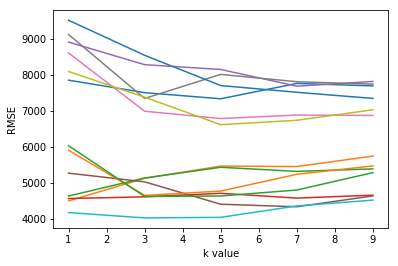

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


In [25]:
#прикинем среднюю из среднеквадратичных отклонений, что бы выполнять задания дальше
k_rmse_results_mean = {}
for key, value in k_rmse_results.items():
    k_rmse_results_mean[key] = np.mean(list(value.values()))

#Так даже красивее
k_rmse_results_mean = pd.Series(k_rmse_results_mean)
k_rmse_results_mean.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

# 4/6 Multivariate Model

* Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
    * Instead of using just a single column for train and test, use all of the columns passed in.
    * Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
* Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Display all of the RMSE values.

In [41]:
def knn_train_test3(train_col, target_col, df):
    
    np.random.seed(1)
    
    df2 = df.reindex(np.random.permutation(df.index))

    train_df = df2.iloc[0:int(len(df2) / 2)]
    test_df = df2.iloc[int(len(df2) / 2):]
    
    
    knn = KNeighborsRegressor()    
    knn.fit(train_df[train_col], train_df[target_col])
    predicted_labels = knn.predict(test_df[train_col])

    mse = mean_squared_error(test_df[target_col], predicted_labels)

    return np.sqrt(mse)

In [42]:
k_rmse_results = {}
k_rmse_results['2Best'] = knn_train_test3(['horsepower', 'width'], 'price', continuous_cars)
k_rmse_results['3Best'] = knn_train_test3(['horsepower', 'width', 'curb-weight'], 'price', continuous_cars)
k_rmse_results['4Best'] = knn_train_test3(['horsepower', 'width', 'curb-weight', 'highway-mpg'], 'price', continuous_cars)
k_rmse_results['5Best'] = knn_train_test3(['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length'], 'price', continuous_cars)
k_rmse_results['6Best'] = knn_train_test3(['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length', 'city-mpg'], 'price', continuous_cars)


#Так даже красивее
k_rmse_results = pd.Series(k_rmse_results)
k_rmse_results.sort_values()

3Best    3305.940140
4Best    3358.691580
2Best    3589.313262
6Best    3628.261188
5Best    3665.546673
dtype: float64

# 5/6 Hyperparameter Tuning

* For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
* Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [45]:
def knn_train_test4(train_col, target_col, df):
    
    np.random.seed(1)
    
    df2 = df.reindex(np.random.permutation(df.index))

    train_df = df2.iloc[0:int(len(df2) / 2)]
    test_df = df2.iloc[int(len(df2) / 2):]
    
    k_values = [i for i in range(1, 25)]
    k_rmse = {}
    
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)    
        knn.fit(train_df[train_col], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_col])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse

    return k_rmse

In [54]:
k_rmse_results = {}
k_rmse_results['3Best'] = knn_train_test4(['horsepower', 'width', 'curb-weight'], 'price', continuous_cars)
k_rmse_results['4Best'] = knn_train_test4(['horsepower', 'width', 'curb-weight', 'highway-mpg'], 'price', continuous_cars)
k_rmse_results['2Best'] = knn_train_test4(['horsepower', 'width'], 'price', continuous_cars)

#Так даже красивее
k_rmse_results

{'3Best': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 '4Best': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.943179452285,
  16: 4528.579

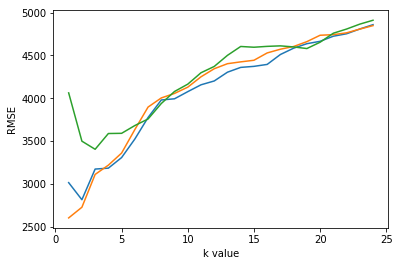

In [55]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# 6/6 Next Steps
* That's it for the guided steps. Here are some ideas for next steps:
    * Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
    * Modify the knn_train_test() function to perform the data cleaning as well.